In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def split(array, nrows, ncols):
    """Split a matrix into sub-matrices."""
    r, h = array.shape
    return (array.reshape(h//nrows, nrows, -1, ncols).swapaxes(1, 2).reshape(-1, nrows, ncols))

In [3]:
images_path = r"C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml\images"

In [119]:
im = cv2.imread(os.path.join(images_path,'20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg'),cv2.IMREAD_UNCHANGED)
mask = cv2.imread(os.path.join(images_path,'mask_20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg'),cv2.IMREAD_UNCHANGED)

In [32]:

i=0
hfin = np.dstack((im[i:i+8,:],im[i:i+8,:],im[i:i+8,:]))
temp    = np.dstack(([255]*512,[0]*512,[0]*512))
for i in range(8,512,8):
    temp1   = np.dstack((im[i:i+8,:],im[i:i+8,:],im[i:i+8,:]))
    hfin    = np.vstack((hfin,temp,temp1))



In [52]:
hsp = np.hsplit(hfin,512//8)
fin =  hsp[0]
temp    = np.dstack(([255]*575,[0]*575,[0]*575)).reshape(575,1,3)
for i in range(1,len(hsp)):
    fin = np.hstack((fin,temp,hsp[i]))



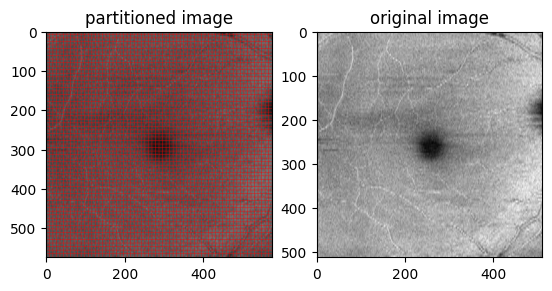

In [160]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(fin)
ax[0].title.set_text('partitioned image')
ax[1].imshow(im,cmap='gray')
ax[1].title.set_text('original image')
plt.show()

# Creating dataset of 8x8 blocks

Spliting the image into square blocks of 8x8 - Non overlapping; because statistically at least 30 observations are 
considered as significant number of observations
8x8 has 64 which is greater than 30

In [211]:
blocks_im = split(im,8,8)
blocks_mask = split(mask_er,8,8)

In [216]:
labels = [] #255 in blocks_mask[0]
lis_data = []
for i in range(blocks_im.shape[0]):
    lis_data.append(list(blocks_im[i].flatten()))
    if np.any(blocks_mask[i]>240):
        labels.append(1)
    else:
        labels.append(0)


In [223]:
np.array([1]*3) - np.array([1,2,3])

array([ 0, -1, -2])

In [226]:
np.array(lis_data[0]).reshape(8,8)

array([[82, 97, 97, 89, 94, 95, 86, 81],
       [82, 97, 95, 88, 93, 94, 86, 82],
       [82, 95, 93, 87, 92, 93, 85, 83],
       [83, 93, 91, 85, 91, 90, 84, 84],
       [83, 91, 88, 84, 89, 88, 83, 86],
       [83, 89, 85, 82, 88, 86, 82, 87],
       [84, 88, 83, 81, 87, 84, 81, 88],
       [84, 87, 82, 80, 86, 83, 81, 89]], dtype=uint8)

In [218]:
df = pd.DataFrame(lis_data)
df['labels'] = labels

In [220]:
df_path = r'C:\Users\a_gadari\OneDrive - UNCG\Documents\bdml\dataframes'
df.to_csv(os.path.join(df_path,'8xblocks_labelled_dataset_mak_eroded.csv'),index=False)

# Creating Masked image      

In [60]:
mim = cv2.imread(r'C:\Users\a_gadari\OneDrive - UNCG\Desktop\20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg',cv2.IMREAD_UNCHANGED)

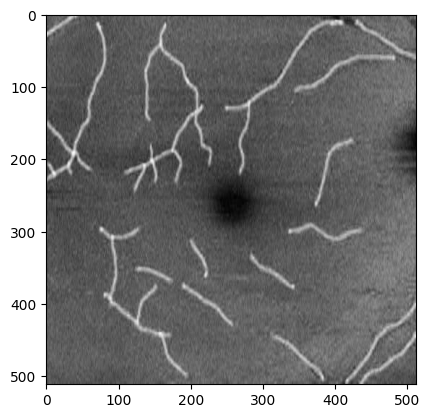

In [66]:
plt.imshow(mim[:,:,0],cmap='gray')

In [111]:
k = np.where(mim[:,:,0]>125)

In [112]:
mask = np.zeros((512,512),dtype=np.uint8)

In [113]:
for ix,jx in zip(list(k[0]),list(k[1])):
    mask[ix,jx] = 255

In [116]:
cv2.imwrite(os.path.join(images_path,'mask_20180828_110013_R_OPT_512x1024x128_ILM_Enface_Avg_IMG_JPG.jpg'),mask)

True

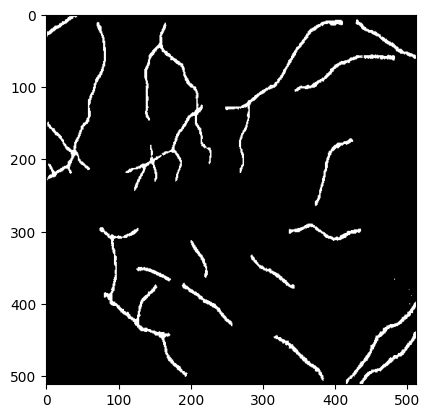

In [117]:
plt.imshow(mask,cmap='gray')

In [183]:
kernel = np.ones((3,3),dtype=np.uint8)

In [194]:
mask_er = cv2.erode(mask,kernel)

In [206]:
m

0

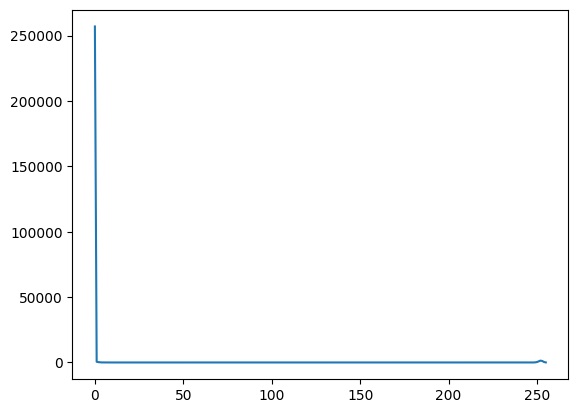

In [209]:
#zz = cv2.calcHist([mask_er],[0],None,[256][0,256])
zz =cv2.calcHist([mask_er],[0],None,[256],[0,256])
plt.plot(zz)

In [210]:
zz

array([[2.56916e+05],
       [5.54000e+02],
       [2.53000e+02],
       [1.31000e+02],
       [3.40000e+01],
       [1.80000e+01],
       [3.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.

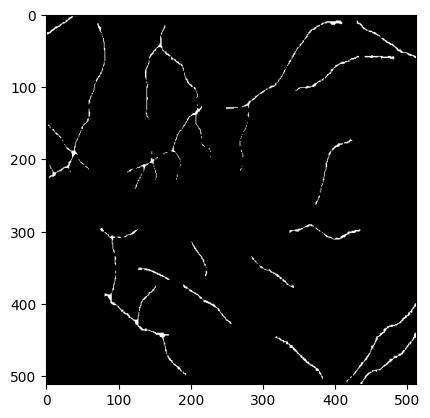

In [195]:
plt.imshow(mask_er,cmap='gray')

In [193]:
sum(df['labels'])

4087